# DataArray

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data = np.random.rand(4, 3)
locs = ['IA', 'IL', 'IN']
times = pd.date_range('2000-01-01', periods=4)
foo = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])
foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.63955851, 0.89429351, 0.85464299],
       [0.56388861, 0.55358797, 0.56232503],
       [0.34118386, 0.54551982, 0.58094369],
       [0.24628288, 0.694004  , 0.72138733]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [3]:
# minimal init 
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)>
array([[0.63955851, 0.89429351, 0.85464299],
       [0.56388861, 0.55358797, 0.56232503],
       [0.34118386, 0.54551982, 0.58094369],
       [0.24628288, 0.694004  , 0.72138733]])
Dimensions without coordinates: dim_0, dim_1

In [4]:
xr.DataArray(data, coords=[('time', times), ('space', locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[0.63955851, 0.89429351, 0.85464299],
       [0.56388861, 0.55358797, 0.56232503],
       [0.34118386, 0.54551982, 0.58094369],
       [0.24628288, 0.694004  , 0.72138733]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [5]:
xr.DataArray(
    data, 
    coords={'time': times, 
            'space': locs, 
            'const': 42, 
            'ranking': ('space', [1, 2, 3])},
    dims=['time', 'space'])

<xarray.DataArray (time: 4, space: 3)>
array([[0.63955851, 0.89429351, 0.85464299],
       [0.56388861, 0.55358797, 0.56232503],
       [0.34118386, 0.54551982, 0.58094369],
       [0.24628288, 0.694004  , 0.72138733]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (space) int64 1 2 3

In [6]:
xr.DataArray(
    data,
    coords={'time': times,
            'space': locs,
            'const': 42,
            'ranking': (('time', 'space'), np.arange(12).reshape(4, 3))},
    dims=['time', 'space'])

<xarray.DataArray (time: 4, space: 3)>
array([[0.63955851, 0.89429351, 0.85464299],
       [0.56388861, 0.55358797, 0.56232503],
       [0.34118386, 0.54551982, 0.58094369],
       [0.24628288, 0.694004  , 0.72138733]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (time, space) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [7]:
df = pd.DataFrame({'x': [0, 1], 'y': [2, 3]}, index=['a', 'b'])
df.index.name = 'abc'
df.columns.name = 'xyz'
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [8]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]])
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

# DataArray Properties

In [9]:
foo.values

array([[0.63955851, 0.89429351, 0.85464299],
       [0.56388861, 0.55358797, 0.56232503],
       [0.34118386, 0.54551982, 0.58094369],
       [0.24628288, 0.694004  , 0.72138733]])

In [10]:
foo.dims

('time', 'space')

In [11]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [12]:
foo.attrs

{}

In [13]:
print(foo.name)

None


In [14]:
foo.values = 1.1 * foo.values
foo.values

array([[0.70351436, 0.98372286, 0.94010729],
       [0.62027747, 0.60894677, 0.61855754],
       [0.37530225, 0.60007181, 0.63903806],
       [0.27091116, 0.7634044 , 0.79352607]])

In [15]:
foo.name = 'foo'
foo.attrs['units'] = 'meters'
foo

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[0.70351436, 0.98372286, 0.94010729],
       [0.62027747, 0.60894677, 0.61855754],
       [0.37530225, 0.60007181, 0.63903806],
       [0.27091116, 0.7634044 , 0.79352607]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [16]:
foo.rename('foofoo')

<xarray.DataArray 'foofoo' (time: 4, space: 3)>
array([[0.70351436, 0.98372286, 0.94010729],
       [0.62027747, 0.60894677, 0.61855754],
       [0.37530225, 0.60007181, 0.63903806],
       [0.27091116, 0.7634044 , 0.79352607]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [17]:
foo.coords['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [18]:
foo['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [19]:
foo['ranking'] = ('space', [1, 2, 3])
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    ranking  (space) int64 1 2 3

In [20]:
del foo['ranking']
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

### Dataset

In [21]:
temp = 15 + 8*np.random.randn(2, 2, 3)
precip = 10 * np.random.randn(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]
ds = xr.Dataset({'temperature': (['x', 'y', 'time'], temp),
                 'precipitation': (['x', 'y', 'time'])},
                coords={'lon': (['x', 'y', lon]),
                        'lat': (['x', 'y', lat]),
                        'time': pd.date_range('2014-09-06', periods=3),
                        'reference_time': pd.Timestamp('2014-09-05')})
ds

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:         (lat: 3, lon: 3, precipitation: 3, time: 3, x: 2, y: 2)
Coordinates:
  * precipitation   (precipitation) <U4 'x' 'y' 'time'
  * lon             (lon) object 'x' 'y' [[-99.83, -99.32], [-99.79, -99.23]]
  * lat             (lat) object 'x' 'y' [[42.25, 42.21], [42.63, 42.59]]
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 4.672 25.2 19.9 ... 12.37 15.96 12.57

In [22]:
xr.Dataset(dict(bar=foo))

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.7035 0.9837 0.9401 ... 0.2709 0.7634 0.7935

In [23]:
xr.Dataset(dict(bar=foo.to_pandas()))

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) object 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.7035 0.9837 0.9401 ... 0.2709 0.7634 0.7935

### Dataset contents

In [24]:
'temperature' in ds

True

In [25]:
ds['temperature']

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[ 4.67182863, 25.19728957, 19.90171327],
        [19.54971013, 17.67225657, 19.39266773]],

       [[ 7.39094294, 25.12214836, 12.80956643],
        [12.3661375 , 15.96394316, 12.57002456]]])
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [26]:
ds.temperature

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[ 4.67182863, 25.19728957, 19.90171327],
        [19.54971013, 17.67225657, 19.39266773]],

       [[ 7.39094294, 25.12214836, 12.80956643],
        [12.3661375 , 15.96394316, 12.57002456]]])
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [27]:
ds.data_vars

Data variables:
    temperature  (x, y, time) float64 4.672 25.2 19.9 ... 12.37 15.96 12.57

In [28]:
ds.coords

Coordinates:
  * precipitation   (precipitation) <U4 'x' 'y' 'time'
  * lon             (lon) object 'x' 'y' [[-99.83, -99.32], [-99.79, -99.23]]
  * lat             (lat) object 'x' 'y' [[42.25, 42.21], [42.63, 42.59]]
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

In [29]:
ds.attrs

{}

In [30]:
ds.attrs['title'] = 'Example Attribute'
ds

<xarray.Dataset>
Dimensions:         (lat: 3, lon: 3, precipitation: 3, time: 3, x: 2, y: 2)
Coordinates:
  * precipitation   (precipitation) <U4 'x' 'y' 'time'
  * lon             (lon) object 'x' 'y' [[-99.83, -99.32], [-99.79, -99.23]]
  * lat             (lat) object 'x' 'y' [[42.25, 42.21], [42.63, 42.59]]
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 4.672 25.2 19.9 ... 12.37 15.96 12.57
Attributes:
    title:    Example Attribute

### Dictionary-like Methods

In [31]:
ds = xr.Dataset()
ds['temperature'] = (('x', 'y', 'time'), temp)
ds['temperature_double'] = (('x', 'y', 'time'), 2 * temp)
ds['precipitation'] = (('x', 'y', 'time'), precip)
ds.coords['lat'] = (('x', 'y'), lat)
ds.coords['lon'] = (('x', 'y'), lon)
ds.coords['time'] = pd.date_range('2014-09-06', periods=3)
ds.coords['reference_time'] = pd.Timestamp('2014-09-05')

### Transforming Data Sets

In [33]:
ds[['temperature']]

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 4.672 25.2 19.9 ... 12.37 15.96 12.57

In [34]:
ds[['temperature', 'temperature_double']]

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 4.672 25.2 19.9 ... 15.96 12.57
    temperature_double  (x, y, time) float64 9.344 50.39 39.8 ... 31.93 25.14

In [35]:
ds.drop_vars('temperature')

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 9.344 50.39 39.8 ... 31.93 25.14
    precipitation       (x, y, time) float64 -3.338 -16.18 ... -7.059 2.075

In [36]:
ds.drop_dims('time')

<xarray.Dataset>
Dimensions:         (x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [37]:
ds.assign(temp2=2 * ds.temperature)

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 4.672 25.2 19.9 ... 15.96 12.57
    temperature_double  (x, y, time) float64 9.344 50.39 39.8 ... 31.93 25.14
    precipitation       (x, y, time) float64 -3.338 -16.18 ... -7.059 2.075
    temp2               (x, y, time) float64 9.344 50.39 39.8 ... 31.93 25.14

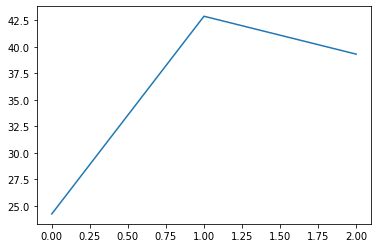

In [40]:
plt.plot((2 * ds.temperature.sel(x=0)).mean('y'));

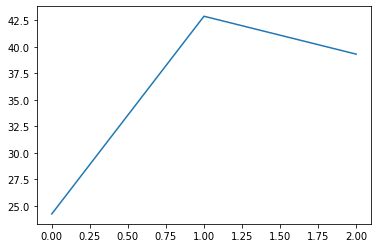

In [42]:
(ds.temperature.sel(x=0).pipe(lambda x: 2 * x).mean('y').pipe(plt.plot));